
#  <center> <font style="color:rgb(100,109,254)"> GUI Automation with PyAutoGUI  </font> </center>

In this notebook we'll take a look into PyAutoGUI library which is a Graphical User Interface (GUI) Automation library. You can use this library not only to automate GUI's but also built simple AI powered game bots.

## <font style="color:rgb(134,19,348)"> PyAutoGUI  </font>

PyautoGui is Cross-platform and you can programmatically control the mouse and keyboard with it.

**Installation:**

You can install the library with the following Command:

```pip install pyautogui```


##  <font style="color:rgb(134,19,348)"> Basic Functionality Of PyautoGUI </font>
Now lets take a look at most of the interesting functions you can do with PyautoGUI.

In [ ]:
import pyautogui as pyg
import time

##  <font style="color:rgb(134,19,348)">Mouse Movement  </font>
 The `moveTo()` function will move the mouse cursor to the X and Y integer coordinates you pass it. 

In [ ]:
pyg.moveTo(100, 200)    

**You can also specify a time duration to reach a particular point.**

In [ ]:
# Reach to these x,y points in 2 seconds
pyg.moveTo(100, 200, 2)    

**If you just want to move in a single axes then you can tell it by making the other axis `None`**

In [ ]:
# The Y value will remain constant
pyg.moveTo(700, None,2)

**You can also specify to move to some distance in x or y or both from the current position by using `move()` function instead of `moveto()`**

In [ ]:
pyg.move(300, 200,2)

## <font style="color:rgb(134,19,348)"> Mouse Drags  </font>
You can also drag objects by using `dragTo()` or `drag` the parameters are pretty similar to  `moveTo()` and `move()`functions. In addition, they have a button keyword which can be set to `left`, `middle`, and `right` for which mouse button to hold down while dragging.

In [ ]:
time.sleep(2)

# Drag mouse to X of 100, Y of 200 in 2 seconds while holding down left mouse button
pyg.dragTo(900, 400, 2, button='left')

## <font style="color:rgb(134,19,348)">Mouse Clicks  </font>
The `click()` function in pyautogui simulates a single, left-button mouse click at the mouse’s current position. A `click` is defined as pushing the button down and then releasing it.

In [ ]:
pyg.click()  

**You can also tell it to move to a certain x,y location and then click the mouse**

In [ ]:
pyg.click(x=100, y=200)

**You can also specify which button to use for clicking, how many times to click and the interval of time between each click**

In [ ]:
pyg.click(button='right', clicks=2, interval=2)

**A simple double click can be done by using `doubleClick()`**

In [ ]:
pyg.doubleClick()  

## <font style="color:rgb(134,19,348)"> Screenshot Functions </font>
PyAutoGUI can take screenshots of screens and it uses Pillow/PIL image format. To take screenshot use the function `screenshot()` it returns an image in Pillow format. 

In [54]:
image = pyg.screenshot()  

**You can also specify a path to save the image in disk**

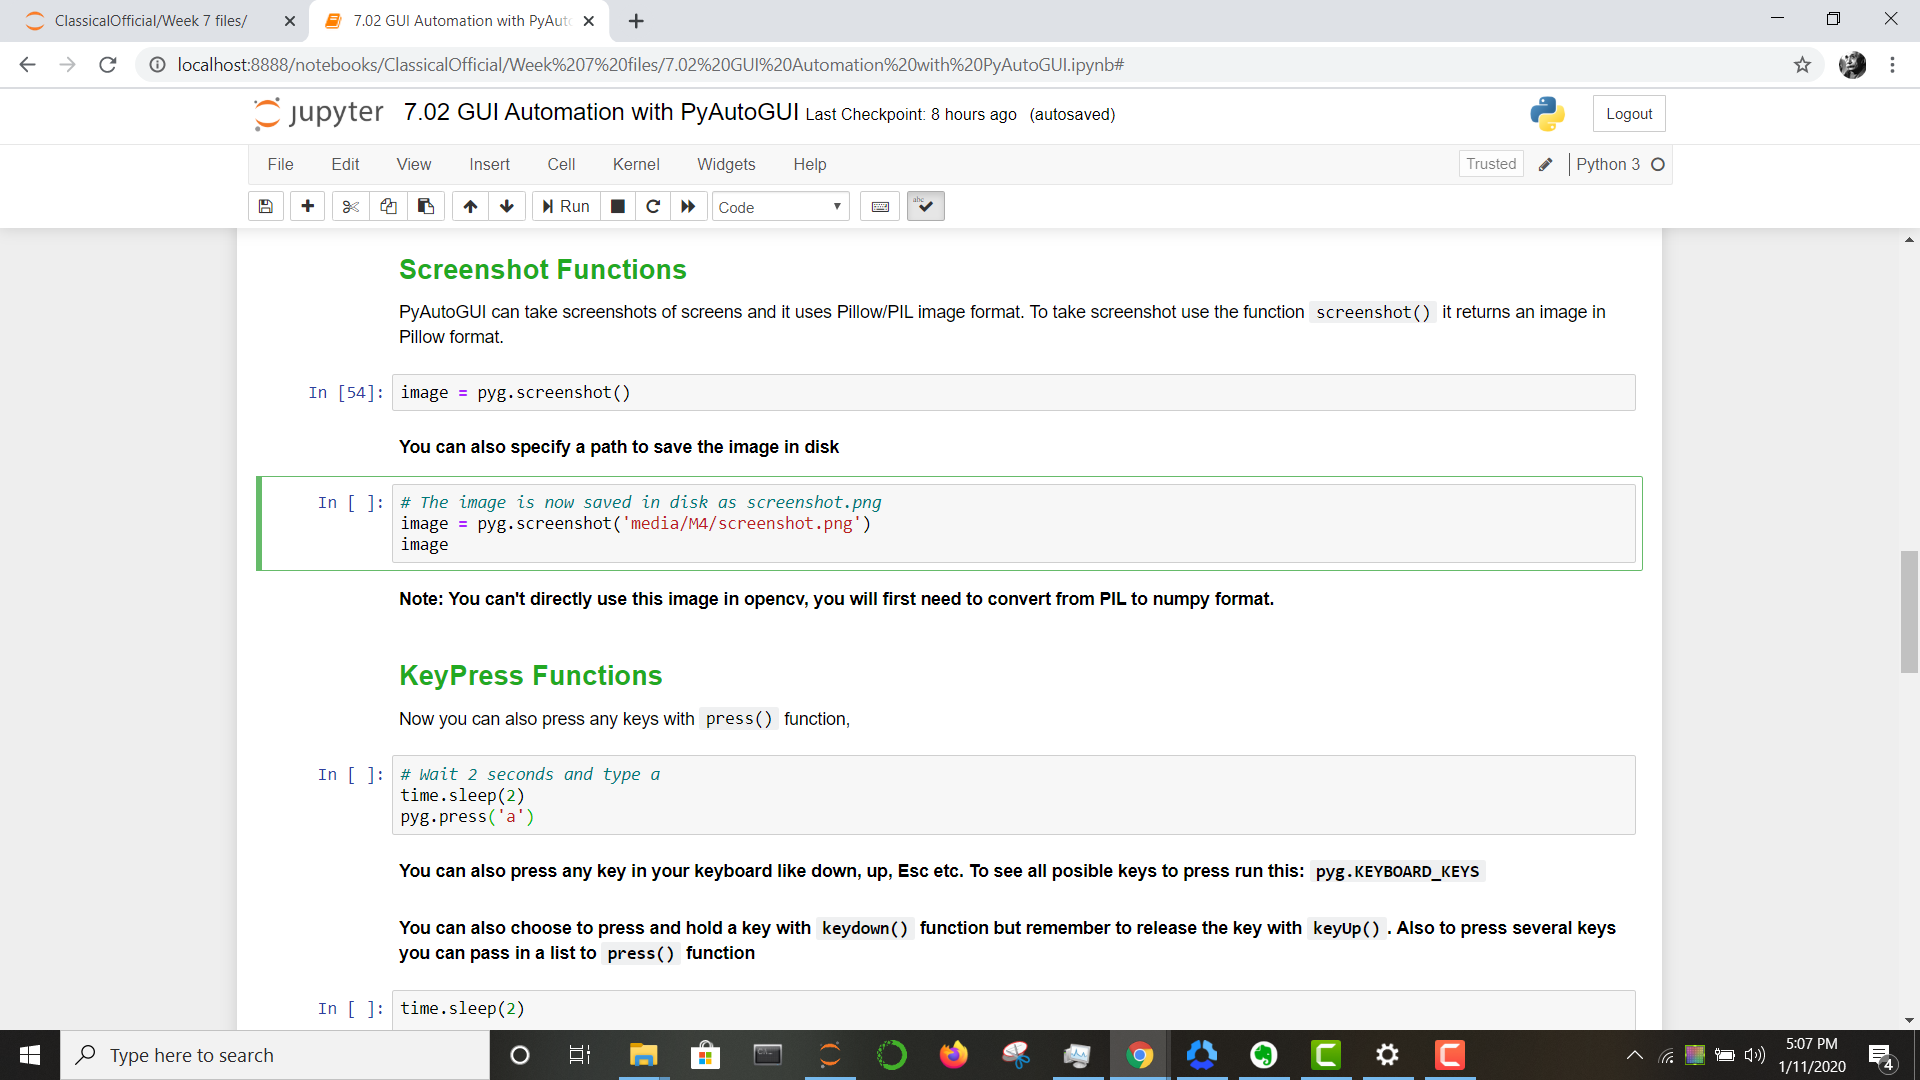

In [55]:
# The image is now saved in disk as screenshot.png
image = pyg.screenshot('media/M4/screenshot.png')
image

**Note: You can't directly use this image in opencv, you will first need to convert from PIL to numpy format.**

## <font style="color:rgb(134,19,348)"> KeyPress Functions </font>
Now you can also press any keys with `press()` function

In [56]:
# Wait 2 seconds and type a
time.sleep(2)
pyg.press('a')

**You can also press any key in your keyboard like down, up, Esc etc. To see all possible keys to press run this: `pyg.KEYBOARD_KEYS`**

**You can also choose to press and hold a key with `keydown()` function but remember to release the key with `keyUp()`.**
**Also to press several keys you can pass in a list to `press()` function**

In [57]:
time.sleep(2)

# hold down the shift key, press down multiple times and then release the shift key
pyg.keyDown('shift') 

pyg.press(['down', 'down', 'down','down','down'])   

pyg.keyUp('shift')    

### <font style="color:rgb(134,19,348)">  Pressing Hot keys </font>
You can also press hot keys (pressing 2 or more keys simultaneously to trigger a specific task)

In [58]:
pyg.hotkey('ctrl', 'c')

### <font style="color:rgb(134,19,348)"> Typing on Screen: </font>
You can also type full sentences with Pyautogui by using function `typewrite()`

In [59]:
time.sleep(2)
# Type with quarter-second pause in between each key 
pyg.typewrite('Hello there, how are you ?', interval=0.20)  

### <font style="color:rgb(134,19,348)"> Getting Mouse current position </font>
You can also get the mouse's x,y location with `position()`

In [61]:
time.sleep(2)
currentMouseX, currentMouseY = pyg.position()
print(currentMouseX , currentMouseY)

1370 325


### <font style="color:rgb(134,19,348)">Get Screen Size  </font>
If your code requires mouse to move at some fix coordinates than the result will vary between monitors of different sizes, so you will need to get the screen size and adjust your parameters according to that.

In [62]:
pyg.size()   

Size(width=1920, height=1080)

## <font style="color:rgb(134,19,348)">Displaying Multiple types of GUI dialogs  </font>
Your program may require user input and assistance, in those cases you may need to use one of the following dialog boxes

In [63]:
print(pyg.alert('This is an alert box.'))
print(pyg.confirm('Shall I proceed?'))
print(pyg.confirm('Enter option.', buttons=['A', 'B', 'C'])  )
print( pyg.prompt('What is your name?') )
print( pyg.password('Enter password (text will be hidden)'))

OK
Cancel
C
Taha anwar
lslflsaflsdfl


## <font style="color:rgb(134,19,348)"> PyautoGui Built in Template Matching </font>
Now template matching is built into pyautogui, you can locate any object on screen by using the method `locateOnScreen()`, In this method you can pass in the template and the confidence. If the object is not found it returns None.

In [64]:
# Returns (left, top, width, height) of matching region
buttonlocation = pyg.locateOnScreen('media/M4/button.png' , confidence=0.90) 
print(buttonlocation)

Box(left=710, top=185, width=144, height=40)


**Now you can get the center of that object using `center()` and then you can click on that object**
Lets see now how we can click the below button, present on top of the screen.
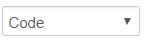

In [65]:
buttonx, buttony = pyg.center(buttonlocation)
pyg.moveTo(buttonx, buttony,1)
pyg.click()

**If you want to get all occurrence of a single object in the screen then use `locateAllOnScreen()`**

In [66]:
# Returns a generator object
button_locations = pyg.locateAllOnScreen('media/M4/button.png' , confidence=0.90) 

# Now you iterate this generator to list out all detected locations of target object
for location in button_locations:
    print(location)

Box(left=710, top=185, width=144, height=40)


**Note: You might be tempted to always use pyautogui built in template matching for finding objects, this is okay for a normal automation pipeline, but remember that opencv template matching implementation is a lot faster and is more appropriate for real time applications e.g. automated game bots**

### [You can read Pyautogui full documentation here for more functions and their details](https://pyautogui.readthedocs.io/en/latest/introduction.html)
    